<a href="https://colab.research.google.com/github/karthickshiva/deeplearning-practice/blob/main/Chapter3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Classifying movie reviews

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [3]:
train_labels[0]

1

In [4]:
train_data.shape

(25000,)

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()]
)
decoded_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]]
)
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [6]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [8]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [9]:
from keras import models, layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [10]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
from keras import optimizers, losses, metrics

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [12]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [13]:
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.5893 - acc: 0.6878 - val_loss: 0.3859 - val_acc: 0.8696
Epoch 2/20
30/30 [==============================] - 1s 37ms/step - loss: 0.3195 - acc: 0.9038 - val_loss: 0.3038 - val_acc: 0.8887
Epoch 3/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2238 - acc: 0.9363 - val_loss: 0.2841 - val_acc: 0.8889
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1723 - acc: 0.9495 - val_loss: 0.2912 - val_acc: 0.8820
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.1383 - acc: 0.9589 - val_loss: 0.2956 - val_acc: 0.8820
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1106 - acc: 0.9696 - val_loss: 0.3381 - val_acc: 0.8737
Epoch 7/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0934 - acc: 0.9767 - val_loss: 0.3085 - val_acc: 0.8829
Epoch 8/20
30/30 [==============================] - 1s 35ms/step - loss: 0.0757 - a

In [14]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [15]:
acc = history_dict['acc']

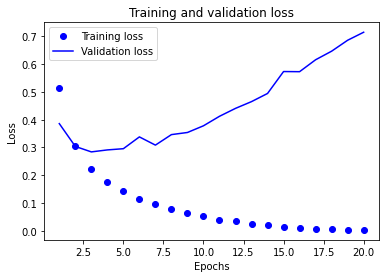

In [16]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

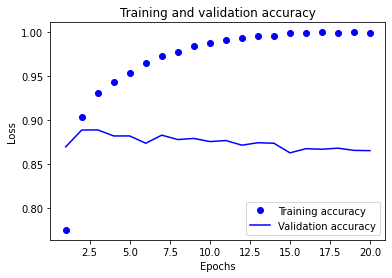

In [17]:
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [18]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 27ms/step - loss: 0.5751 - accuracy: 0.7380
Epoch 2/4
49/49 [==============================] - 1s 27ms/step - loss: 0.2999 - accuracy: 0.9091
Epoch 3/4
49/49 [==============================] - 1s 26ms/step - loss: 0.2114 - accuracy: 0.9292
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2867 - accuracy: 0.8857
[0.2867090702056885, 0.8856800198554993]


In [19]:
print(model.evaluate(x_train, y_train))

782/782 [==============================] - 1s 2ms/step - loss: 0.1367 - accuracy: 0.9572
[0.13673435151576996, 0.9571599960327148]


In [20]:
model.predict(x_test)

array([[0.20912942],
       [0.998675  ],
       [0.9190718 ],
       ...,
       [0.10097429],
       [0.08606538],
       [0.5335763 ]], dtype=float32)

In [23]:
model = models.Sequential()
model.add(layers.Dense(64, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(64, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='mse', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results=model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
49/49 [==============================] - 3s 45ms/step - loss: 0.1709 - accuracy: 0.7378
Epoch 2/4
49/49 [==============================] - 2s 44ms/step - loss: 0.0678 - accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 2s 44ms/step - loss: 0.0505 - accuracy: 0.9355
Epoch 4/4
782/782 [==============================] - 2s 3ms/step - loss: 0.0997 - accuracy: 0.8714
[0.09970708936452866, 0.871399998664856]
